Para traballar co detector de caras é preciso descargar:
- Un sistema para predecir a forma e posición da cara
- Unha RNA para identificar a a cara


In [13]:
import dlib
import cv2 
import numpy as np
import matplotlib.pyplot as plt
from tkinter import Tk, filedialog
import pandas as pd
import csv




In [2]:

try:
    Tk().withdraw()
    path = filedialog.askopenfilename(
        title="Choose an image",
        filetypes=[("Imágenes", "*.jpg *.png *.jpeg")]
    )
except Exception as e:
    print("Can't open the file")
    raise e

if not path:
    print("You don't choose the image")
    exit()

image = cv2.imread(path)
image_color = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

if image is None:
    print("This type of image can't be load")
    exit()



In [3]:

predictor_path ="../../docs/dlib/shape_predictor_5_face_landmarks.dat"
face_rec_model_path = "../../docs/dlib/dlib_face_recognition_resnet_model_v1.dat"


detector = dlib.get_frontal_face_detector()
sp = dlib.shape_predictor(predictor_path)
facerec = dlib.face_recognition_model_v1(face_rec_model_path)


known_face_encodings = []
known_face_names = []

In [4]:

dets = detector(image_color, 1)
print("Number of faces detected: {}".format(len(dets)))
posicions = dets[0]
display(posicions)
shape = sp(image_color,posicions)

face_descriptor = np.array(facerec.compute_face_descriptor(image_color, shape))
display(face_descriptor)

known_face_encodings.append((face_descriptor,"Nicki nicole"))


Number of faces detected: 2


rectangle(2644,1579,3442,2378)

array([-0.12508595,  0.02945247,  0.00741798, -0.0696934 , -0.1040941 ,
        0.08252478, -0.08277139,  0.0125223 ,  0.20654942, -0.12008552,
        0.15680847,  0.04586449, -0.17442739,  0.1002526 , -0.14420564,
        0.21730378, -0.13954933, -0.17575251, -0.04440656, -0.0725698 ,
        0.0041851 ,  0.04747584, -0.01570758,  0.17529741, -0.06130287,
       -0.34397057, -0.00561553, -0.03190754, -0.03839394, -0.08863197,
       -0.0429433 ,  0.05598628, -0.24636438,  0.02885899,  0.06303035,
        0.18143313, -0.0807557 , -0.04936907,  0.19462076,  0.11073338,
       -0.18594092,  0.02522206,  0.06934129,  0.30464178,  0.17294915,
        0.04818583, -0.01053389, -0.05487631,  0.11090683, -0.35710478,
        0.08385962,  0.21443015,  0.06686956,  0.10618245,  0.03833397,
       -0.12922947,  0.04517695,  0.11267801, -0.11645152,  0.07011147,
       -0.01685336, -0.0321738 ,  0.03296323, -0.07550735,  0.22393551,
        0.15267149, -0.09783891, -0.15824752,  0.21622612, -0.16

In [ ]:
face_names = []

dets = detector(image_color, 1)
tolerancia = 0.6
for d in dets:

    shape = sp(image_color,d)
    face_descriptor = np.array(facerec.compute_face_descriptor(image_color, shape))
    print(np.linalg.norm(face_descriptor - known_face_encodings[0][0]))
    # See if the face is a match for the known face(s)
    matches = [(np.linalg.norm(face_descriptor - match[0]), match[1]) for match in known_face_encodings if np.linalg.norm(face_descriptor - match[0]) <= tolerancia]
    print(matches)
    if len(matches) == 0:
        face_names.append(((d.top(), d.right(), d.bottom(), d.left()),"Ni idea:,)"))
    else:
        carasOrdenadas = sorted(matches,key=lambda x: x[0]) 
        face_names.append(((d.top(), d.right(), d.bottom(), d.left()),carasOrdenadas[0][1]))



0.0
[(np.float64(0.0), 'Nicki nicole')]
0.9176043243757857
[]


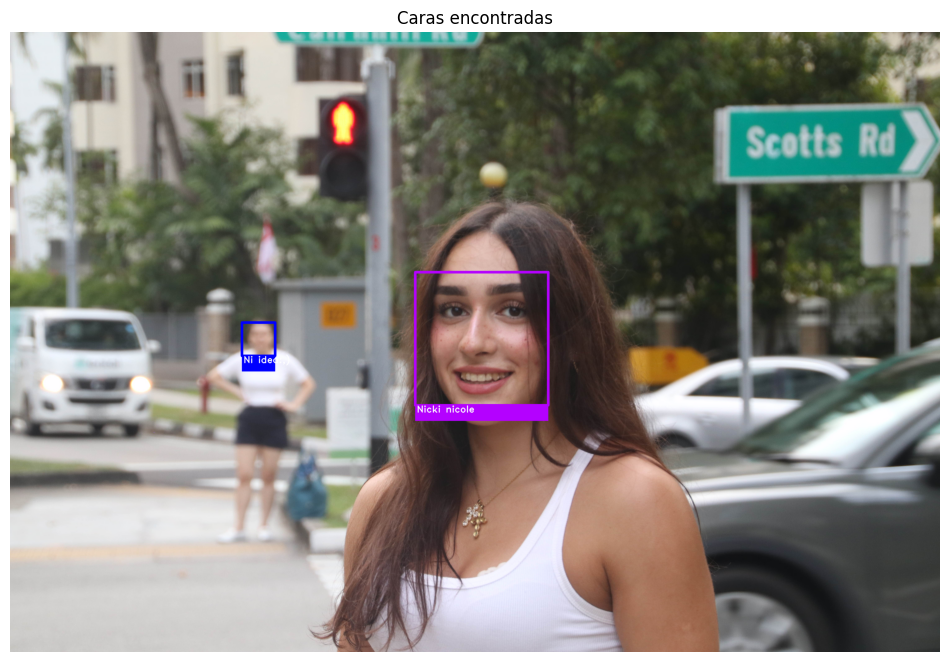

In [10]:
img_marcas = image_color.copy()

h_img, w_img, _ = img_marcas.shape

padding = 30  
grosor_linea = 15 # Antes era 8, lo subimos para que se vea bien

for (top, right, bottom, left), name in face_names:
    
    top_p = max(0, top - padding)
    left_p = max(0, left - padding)
    bottom_p = min(h_img, bottom + padding)
    right_p = min(w_img, right + padding)

    colour = (180, 1, 255) if not name == "Ni idea:,)" else (0, 0, 255)

    cv2.rectangle(img_marcas, (left_p, top_p), (right_p, bottom_p), colour, grosor_linea)

    alto_etiqueta = 100
    
    cv2.rectangle(img_marcas, (left_p, bottom_p), (right_p, bottom_p + alto_etiqueta), colour, cv2.FILLED)
    
    font = cv2.FONT_HERSHEY_DUPLEX
    
    cv2.putText(img_marcas, name, (left_p + 10, bottom_p + 45), font, 2.0, (255, 255, 255), 3)

plt.figure(figsize=(12, 12)) 
plt.imshow(img_marcas)
plt.title('Caras encontradas')
plt.axis('off') 
plt.show()

Guardar CSV

In [22]:

face_descriptor_list = list(face_descriptor)
nombre_archivo = "faces_names.csv"


print(f"Guardando datos en {nombre_archivo}...")

with open(nombre_archivo, mode='w', newline='') as fichero:
    
    writer = csv.writer(fichero)
    writer.writerow(['Nicki nicole']+face_descriptor_list)

print("Creado el csv.")

Guardando datos en faces_names.csv...
Creado el csv.


FORMA ISAAC

import pandas as pd
display(",".join(face_descriptorPhill.astype(str)))
csv = pd.DataFrame(data={'nome':['Phill'], 'fingerprint':[",".join(face_descriptorPhill.astype(str))]})
display(csv)

csv.to_csv('proba.csv')

leido = pd.read_csv('proba.csv')
display(leido)
leido["f2"] = leido.apply(lambda row: np.array(row['fingerprint'].split(',')).astype(np.float64), axis=1)